In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score

## Data Exploration

In [38]:
df = pd.read_csv("Employee_turn_over_data.csv")

In [39]:
df.head()

,satisfaction score,last evaluation,number project,average montly hours,time spend company,work accident,left,promotion last 5years,job role,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [40]:
df.tail()

,satisfaction score,last evaluation,number project,average montly hours,time spend company,work accident,left,promotion last 5years,job role,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [41]:
df.shape

(14999, 10)

In [42]:
df.columns

Index(['satisfaction score', 'last evaluation', 'number project',
       'average montly hours', 'time spend company', 'work accident', 'left',
       'promotion last 5years', 'job role', 'salary'],
      dtype='object')

In [43]:
df.nunique()

satisfaction score        92
last evaluation           65
number project             6
average montly hours     215
time spend company         8
work accident              2
left                       2
promotion last 5years      2
job role                  10
salary                     3
dtype: int64

In [44]:
# checking for null data
df.isnull().sum()

satisfaction score       0
last evaluation          0
number project           0
average montly hours     0
time spend company       0
work accident            0
left                     0
promotion last 5years    0
job role                 0
salary                   0
dtype: int64

In [45]:
#preprocessing
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [46]:
df = handle_non_numerical_data(df)
df.head()

,satisfaction score,last evaluation,number project,average montly hours,time spend company,work accident,left,promotion last 5years,job role,salary
0,0.38,0.53,2,157,3,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0


In [47]:
df.describe()

,satisfaction score,last evaluation,number project,average montly hours,time spend company,work accident,left,promotion last 5years,job role,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.469698,0.941996
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,3.275683,0.956151
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,7.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


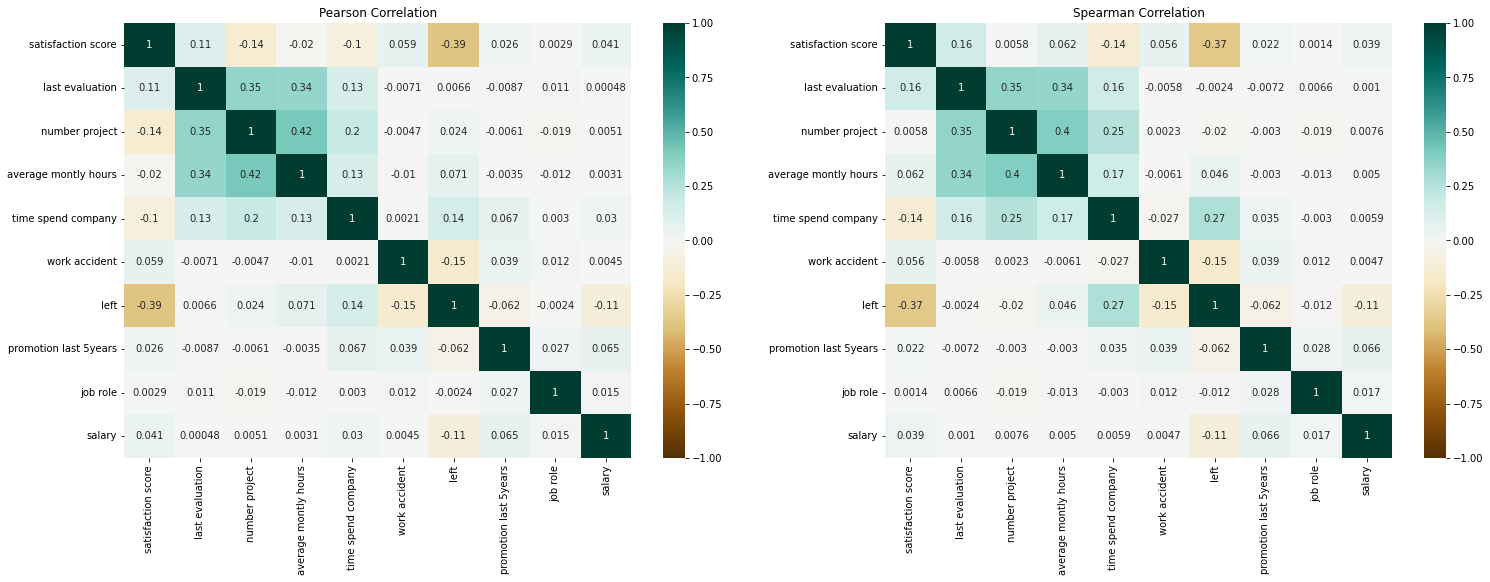

In [48]:
#Correlation matrix
fig, axes = plt.subplots(1, 2, figsize=(25,8))

#pearson correlation
correlation_pearson = df.corr(method="pearson")
sns.heatmap(correlation_pearson, ax=axes[0], vmin=-1, vmax=1, annot=True, cmap='BrBG')
axes[0].set_title('Pearson Correlation')

#spearman correlation
correlation_spearman = df.corr(method="spearman")
sns.heatmap(correlation_spearman, ax=axes[1], vmin=-1, vmax=1, annot=True, cmap='BrBG')
axes[1].set_title('Spearman Correlation')

plt.show()

No statistically significant correlations. 

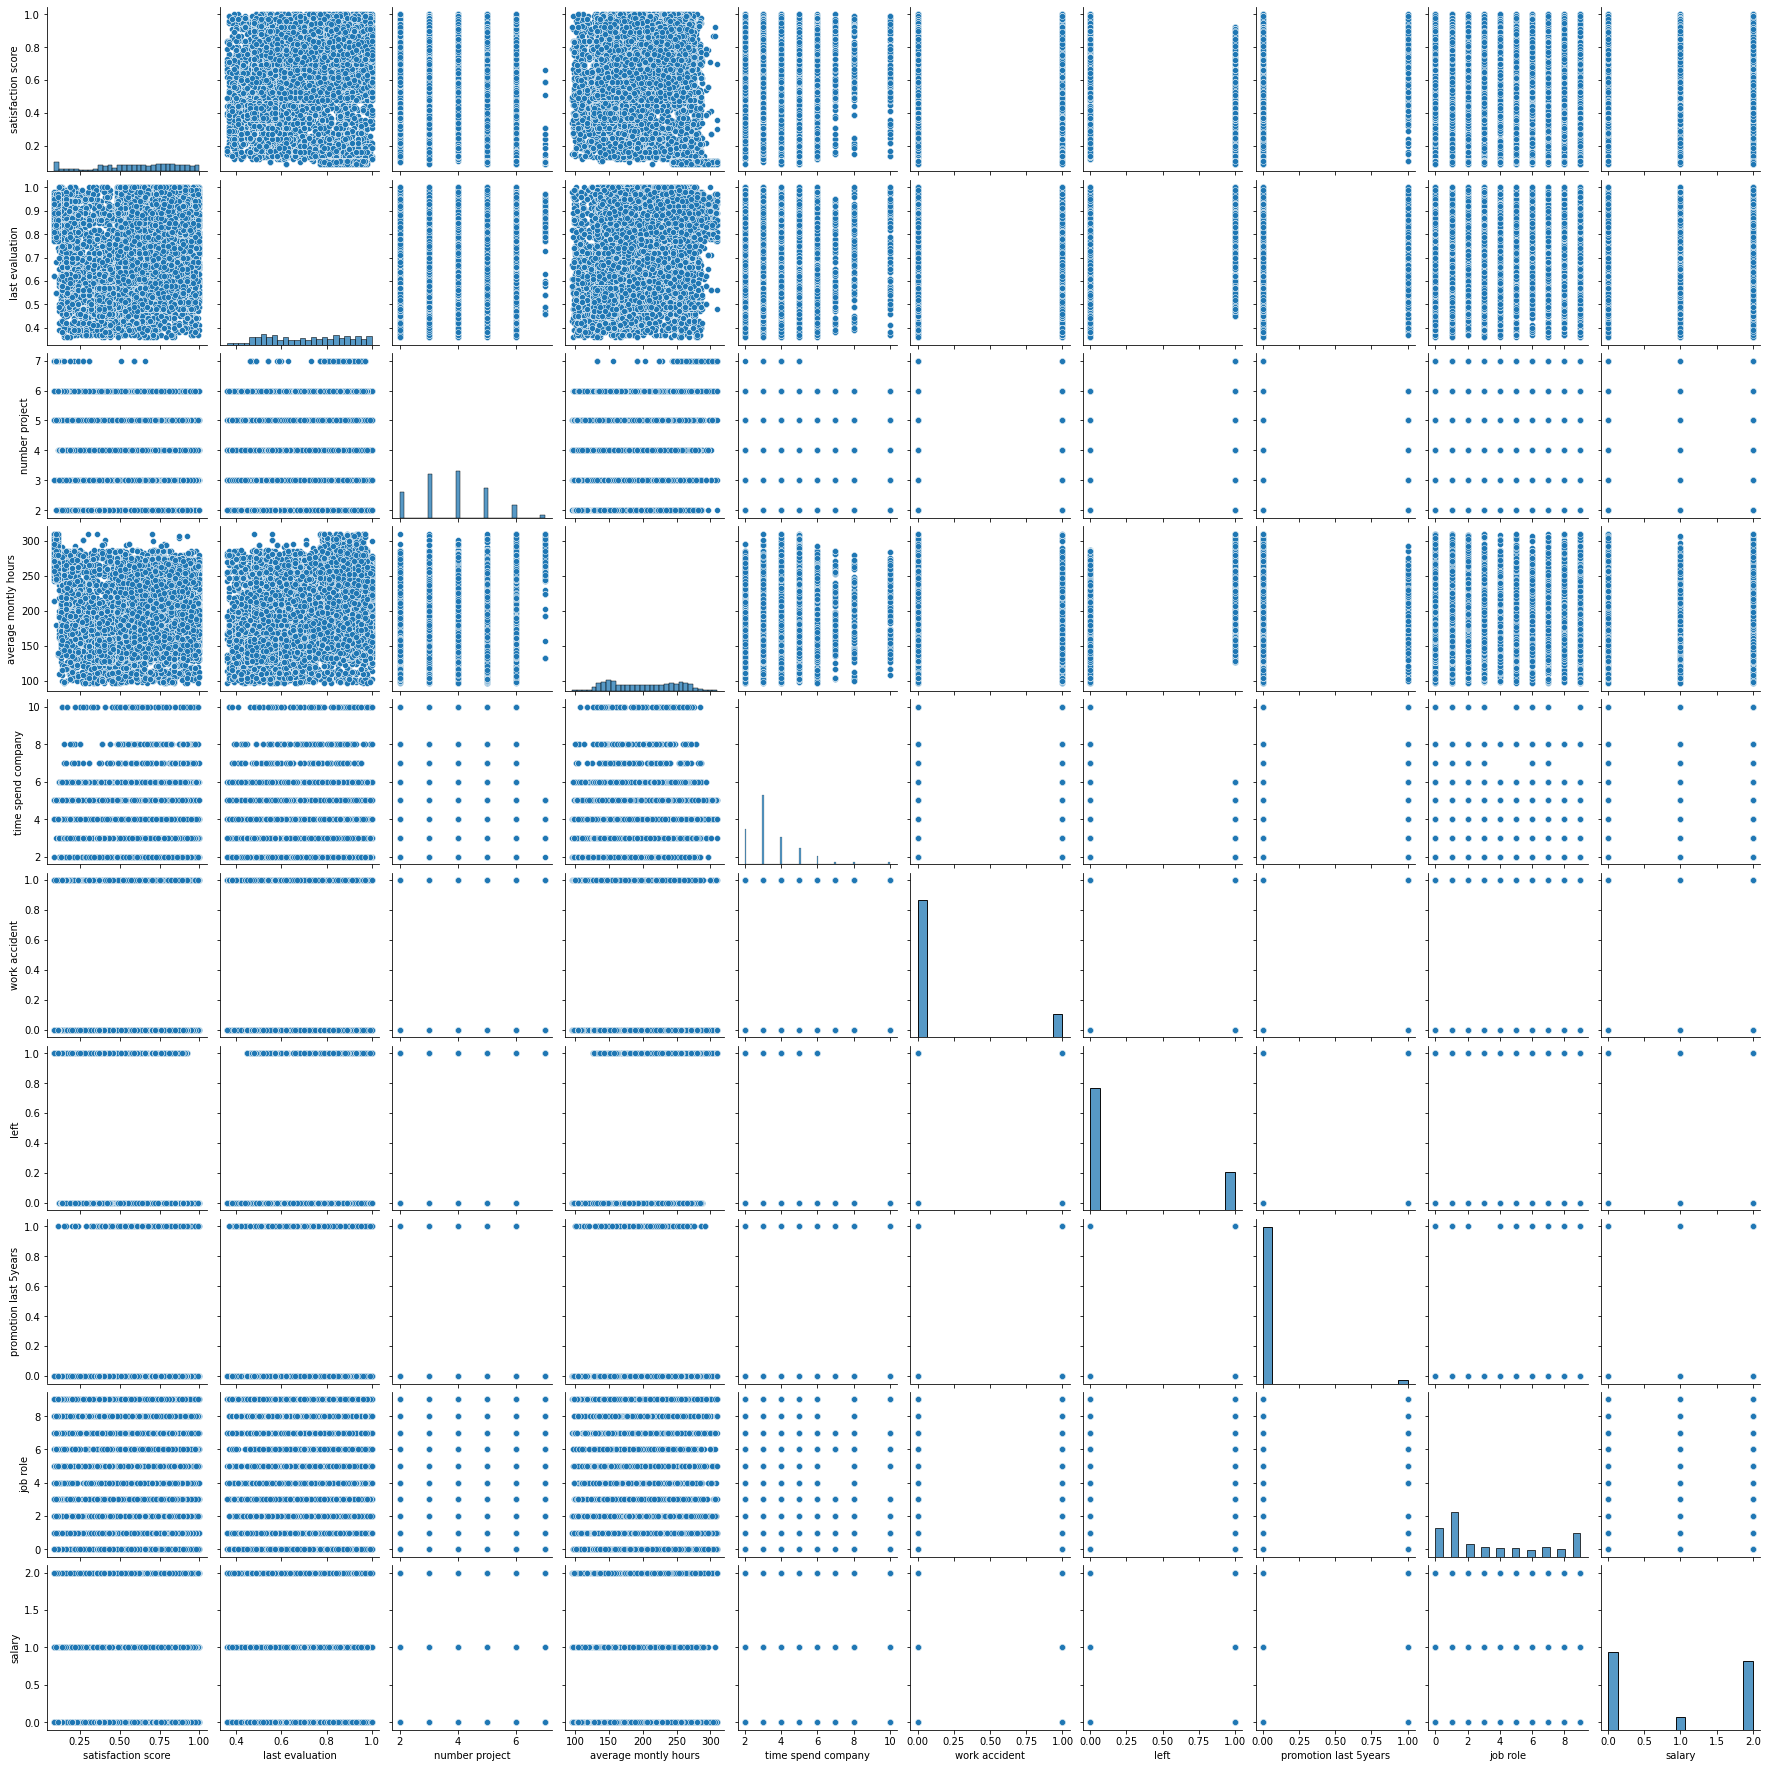

In [49]:
sns.pairplot(df)

The goal of this project is to predict the likelihood of a given employee leaving a firm. So naturally the first step is too check the statistics and observe the distribution of employees who have stayed and left the firm. from the histogram and the statistics from the "left" column we observe that there are more employees who stay than who leave. in fact from observing the histogram it appears as if ~65% of employees stay vs. ~35% of employees who leave. Other than this the scatterplot comparison of our data does not provide much visual information. 

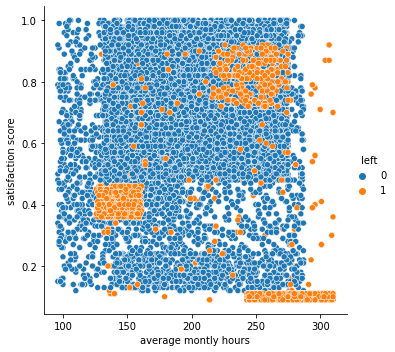

In [66]:
#checking the relationship between satisfaction score and average monthly hours
sns.relplot(x='average montly hours', y='satisfaction score', hue='left', data=df)

In comparing the satisfaction score with the average monthly hours it appears there are three clusters of employees who are likely to leave.
 - employees with the highest monthly hours are more likely to leave.
 - employees with satisfaction around 0.4 and around 150 hours per month are more likely to leave.
 - employees with around 0.8 satisfaction nad around 250 hours per month are more likely to leave.

boxplots, histograms

## Bagging

Since the goal of the project is predicting wether an employee will leave or not, I will treat this as a classification problem since we are predicting discrete values. I will use a decision tree classifier. Another reason that I have chosen to use a decision tree is that they are very well suited to work with bagging. The purpose of bagging is to reduce the amount of variance in a black box model. I have chosen to use 20 estimators in the bagging model, the sci-kit learn default is 20, this number was chosen arbitrarly. 

In [51]:
Y = df['left']
X = df.drop(['left'], axis=1) 

In [52]:
#splitting the data 70% training 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [59]:
#applying bagging to the random forest model
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20, random_state=1)

In [60]:
bagging_classifier.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  random_state=1)

In [96]:
#using 10-cross validation to evaluate the model, where the mean score is what we will consider 
bagging_scores = cross_val_score(bagging_classifier, x_test, y_test, cv=10)

In [98]:
#prints out model accuracy and standard deviation 
print("Accuracy: %0.2f (+/- %0.2f)" % (bagging_scores.mean(), bagging_scores.std()*2))

Accuracy: 0.98 (+/- 0.01)


## Boosting

The goal of boosting is to take a weak learner and imporve upon it. Boosting makes these improvements by taking a weak learner running the model and giving feedback to the model, which is then run with the given feeback. This process repeats itself to turn weak learners into strong learners. I am going to continue the trend of using decision trees. Decision trees can be turned into weak learners by allowing for only a single split. The best boosting method for these types of trees is AdaBoost. similar to the bagging model the number of estimators was chosen arbitrarly. I chose to use a larger number of estimators since there is only a single spilt in the decision tree meaning that each estimator will return less information than a complete decision tree. 


In [88]:
#max depth needs to be set to 1 so that decision trees do not grow out
adb_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=1)

In [89]:
adb_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=100)

In [100]:
#using 10-cross validation to evaluate the model
boosting_scores = cross_val_score(adb_clf, x_test, y_test, cv=10)

In [101]:
#prints out model accuracy and standard deviation 
print("Accuracy: %0.2f (+/- %0.2f)" % (boosting_scores.mean(), boosting_scores.std()*2))

Accuracy: 0.96 (+/- 0.01)


## Summary

The Bagging model performed slightly better than the boosting model with the same amount of variance. I believe that the reason for superior performance in the bagging model can be explained by the base estimator. The bagging model used 20 complete decision trees as opposed to the 100 stumps used in the boosting model. I considered using full trees in the boosting model however this would have led to overfitting and given an unaccurate score. I future tests I would change the number of estimators in each of the models to gain a better understanding of how varying this parameter would affect the score.